In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C://Users//Ansh Jhoshi//Downloads//nlp_start//UpdatedResumeDataSet.csv")
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
print("Unique values of datasets \n")
print(df["Category"].unique())

Unique values of datasets 

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [5]:
print("Now time for values counts\n")
print(df["Category"].value_counts())

Now time for values counts

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
ETL Developer                40
Operations Manager           40
Mechanical Engineer          40
Sales                        40
Blockchain                   40
Data Science                 40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Category'>

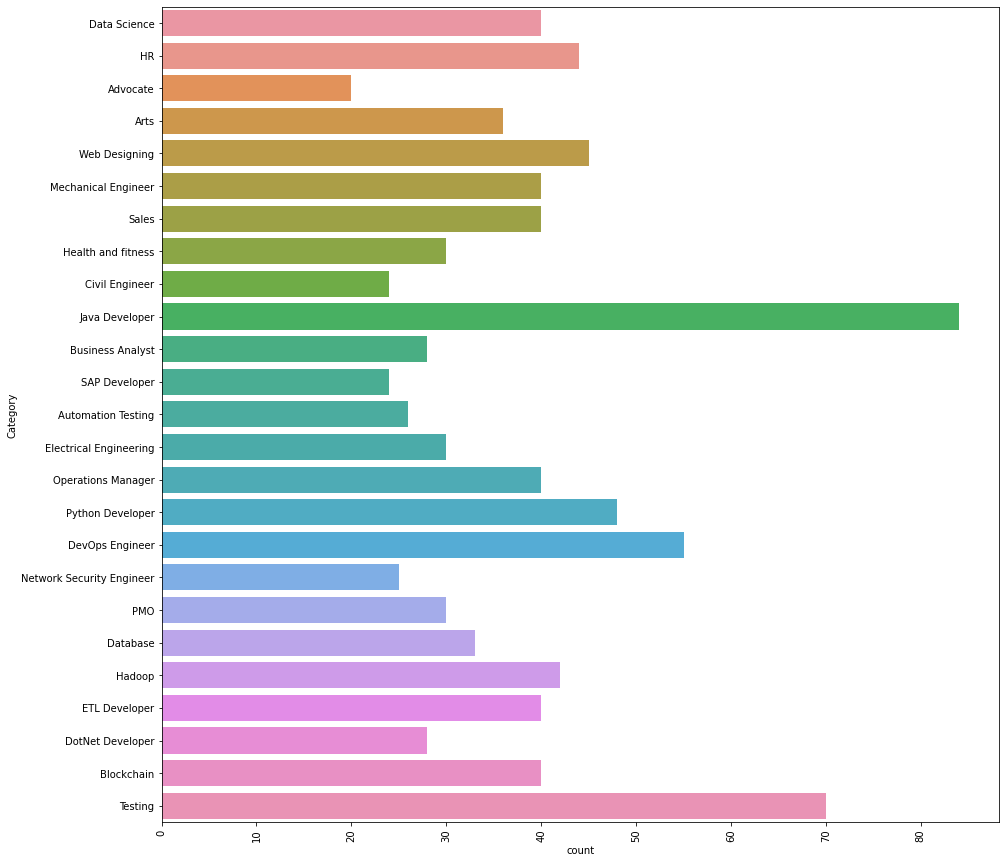

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df)

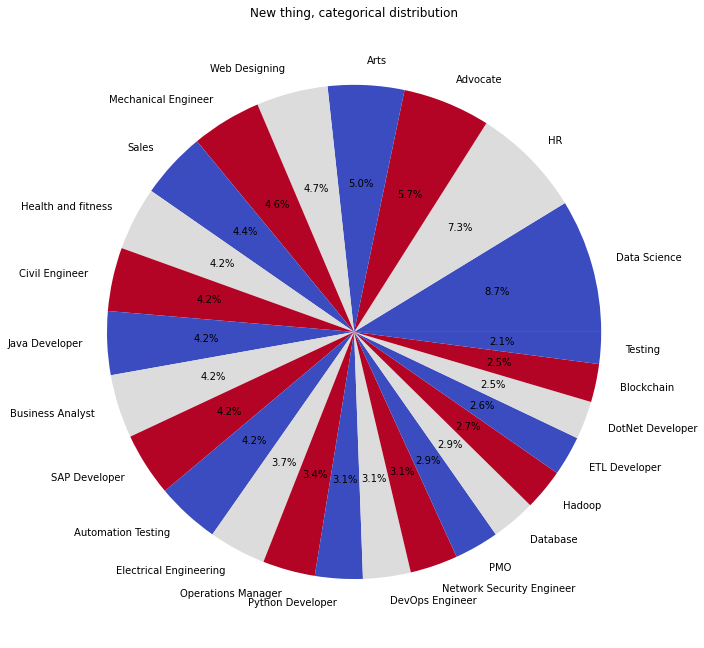

In [7]:
from matplotlib.gridspec import GridSpec

targetcounts = df['Category'].value_counts()
targetlabels = df['Category'].unique()

plt.figure(1, figsize = (25,25))
grid = GridSpec(2,2)

cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(grid[0,1], aspect = 1, title = "New thing, categorical distribution")

source_pie = plt.pie(targetcounts, labels = targetlabels, autopct='%1.1f%%', colors = colors)
plt.show()


#This shit is wrong, sorry for inconvenience

In [8]:
#Helper function for cleaning the dataset

import re

def cleaning(resumetext):
    resumetext = re.sub('http\S+\s*', ' ', resumetext)  #remove URLs
    resumetext = re.sub('RT|cc',' ', resumetext) #remove RT and cc
    resumetext = re.sub('#\S+', ' ', resumetext) #remove hashtags
    resumetext = re.sub('@\S+', ' ', resumetext) #remove mentions
    resumetext = re.sub('[%s]'%re.escape("""!"#$%&'()*+,-./:;<=>@?[\]^_`~{|}"""), ' ', resumetext) #remove punctuations
    resumetext = re.sub(r'[^\x00-\x7f]',r' ', resumetext) #No idea about this one, but I saw this online so it's here
    resumetext = re.sub('\s+', ' ',resumetext) #remove whitespace
    return resumetext


df['CleanedResume'] = df.Resume.apply(lambda x: cleaning(x))
df

,Category,Resume,CleanedResume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,Testing,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [13]:
""" 
Now as we have cleaned the dataset, its time to look at the Wordcloud. A wordcloud represents
the most number of words larger and vice versa
"""


"""  
Word Cloud is a data visualization technique used for representing text data in which the size of 
each word indicates its frequency or importance. Significant textual data points can be highlighted 
using a word cloud. Word clouds are widely used for analyzing data from social network websites.

Source - GeeksForGeeks
"""

import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

stops = set(stopwords.words('english')+['``',"''"])
totalWords = []
sentences = df['Resume'].values
cleanedSentences = ""


In [11]:
sentences = df['Resume'].values
sentences

array(['Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Inves

Most common words are

[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


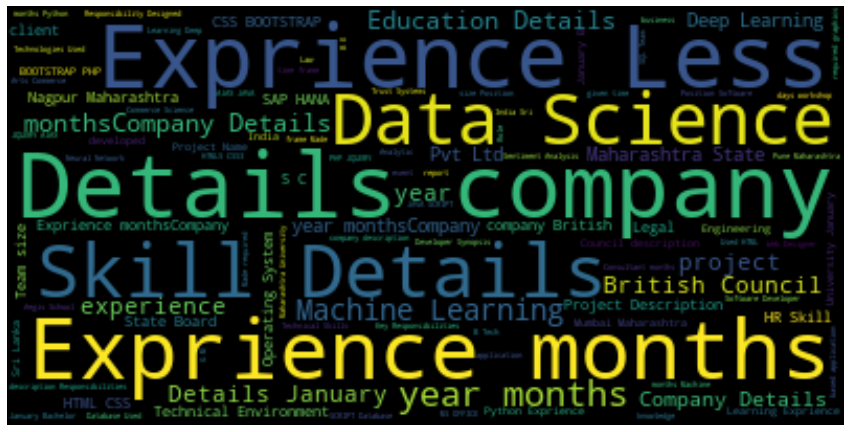

In [14]:
for i in range(0,160):
    cleanedText = cleaning(sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in stops and word not in string.punctuation:
            totalWords.append(word)
            
wordFreqlist = nltk.FreqDist(totalWords)

mostcommon = wordFreqlist.most_common(50)
print("Most common words are\n")
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df

,Category,Resume,CleanedResume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,23,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,23,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [17]:
#K neighbours classifier is a one vs rest classifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

X = df['CleanedResume'].values
Y = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf = True,
    stop_words = 'english',
    max_features=1500)

word_vectorizer.fit(X)
x = word_vectorizer.transform(X)

print("Feature making completed")

x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state=0)

print("x_train.shape = ",x_train.shape)
print("x_test.shape =  ", x_test.shape)

Feature making completed
x_train.shape =  (769, 1500)
x_test.shape =   (193, 1500)


In [20]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(model.score(x_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.99


In [21]:
print("Classification report is as given below \n", metrics.classification_report(y_test, y_pred))

Classification report is as given below 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        19
          16       1.00      1.00      

In [22]:
x

<962x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 113017 stored elements in Compressed Sparse Row format>